# **Forecasting of Catalyst Aging**

## **Introduction**
Many industries rely on chemical reactions to product materials and components necesssary in the making of everyday products. The process of converting raw materials, or reactants, into more useful components often involves reactor systems that are integrated into an overall manufacturing process. The systems usually contain mechanical features that ensure optimal reaction conditions (e.g. good mixing of reactants) and are designed to withstand the necessary temperatures and pressure of the reaction. In many applications these reactor systems also contain a catalyst. A catalyst is an aide in the chemical conversion process. It can be a material or molecule that speeds the rate of reaction or eases the conditions required to carry out the chemical reaction (i.e. temperature and pressure).

Reactor systems with catalyst are typically classified as heterogenous or homogenous systems. This means the catatlyst and reactants are of different material states (e.g. liquid and solid) or the same material state (e.g. liquid and liquid). The former system, heterogeneous, is common within many industries. 

Even though the catalyst is not consumed as part of the reaction, these catalyst systems have a finite life. Overtime they can lose activity. Activity is defined here as the temperature of the reactor system required for the catalyst to perform its function. As catalyst loses activity the required temperature to maintain the same level of conversion increases. Catalyst lose activity for a number of reasons, but most common among them are poisoning and fouling. Poisoning is the process by which contaminants in the raw material react with key features of the catalyst rendering permanent, irreversible damage. Fouling is the process by which contaminants in the feed or undesired byproducts of the reaction deposit on the surface of the catalyst obstructing access to key features of the catalyst that facilitate the reaction. The effects of these are cummulative, and lead to activity losses that eventually require impractically high temperatures that are prohibitied either by the design limits of the equipment. 

It is of great utility then that such activity loss be accounted for and used in a predicitive manner. Manufacturing facilities are complex, integrated processes composed of various unit operations that must exist in concert with eachother. Knowing when one of these unit operations may require downtime for repairs, replacement, or other general maintenace is important. This knowledge allows for proper planning that would enable other needed maintenance to coincide with this downtime as well inventory planning to ensure supply chain operations are not unncessarily constrained or upset. All of these optimizations are crucial to ensuring profitable operations. 

In the excercise that follows a case study will be used to examine the process and pratices by which catalyst activite losses can accounted for and forecasted. The system under consideration for this excercise is a generalized, heterogenous system with a solid, fixed catlyst and liquid phase reactants and products. Details and assumptions of this system wil follow.

## **Case Study**

Feedstock "A" is key material in producing a common precursor chemical in the production of plastics. Feedstock "A" requires pre-treament to remove a contaminant that is known to hinder downstream conversion and manufacturing process. A continous stirred tank reactor (CSTR) system exists to remove contaminant  "B" from "A" from 1 mole%  to less than 1000 ppm (0.1 mol %). The contaminant is remove by reaction with "C" to produce "D" which is then easily separated from "A" in downstream unit operations. 

The regular supplier of Feedstock "A" has had an unplanned facility shutdown. Without a supply of feedstock the reactor system below must shutdown resulting in lost profit. As a result the supply organization within the company has gotten creative and sourced alternative feed stocks, that in combination approximate a design feed; however, the properties of the feed stock have increased variability. Additionally, the plant itself has had some utility reliability issues that have resulted in intermittent slow downs. This has made it difficult for the plant engineering team to asses catalyst health, estimate fouling rates, and predict the end run for the catalyst. The engineering manager has tasked the plant support team with devising a way to account for the increasing operational variability to asses the catalyst health and estimate the remainign catalyst life.

The reactor system being considered is depicted below. Details on assumptions that provide simplications to the probelm are also included. It should be noted that the assumptions below reflect those common in industrial practice and do not introduce an unacceptalble level of error.

#### Assumptions:
* The reaction if first order with respect to each reactant, and the system is design such that reactant C is in large excess of its stoichometric requirement.
* Material A doe not unergo a significant level of reaction.
* The reaction is considered irreversable, and kineticall limited. 
* The reaction is exothermic; however, the reaction rate constant, k, is relatively insensitive to temperature range of operation. 
* The reaction is well mixed and well distributed with in the reactor system. 
* While the process temperature varies from inlet to outlet due to the exothermic nature the systme is rate of reaction and conversion are accurately  charaterized by a average reactor temperature taken between the inlet nad outl temperature and defined here as Ta.

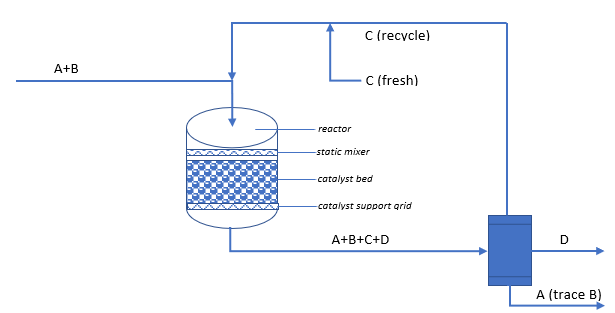

#### Rate Law & Catalyst Activity
To monitor a process and reduce the noise it is important to account for these process deviations. In the case of catalyst activity, Operations and Engineering could be misled about the rate of catalyt fouling if the variability in feed rate and feed properties are not taken into account. In order to enable accounting for these deviations we need to mathematically define how the process parameters affect the reactor system performance.  To start we derive the rate law for a first order reaction. 

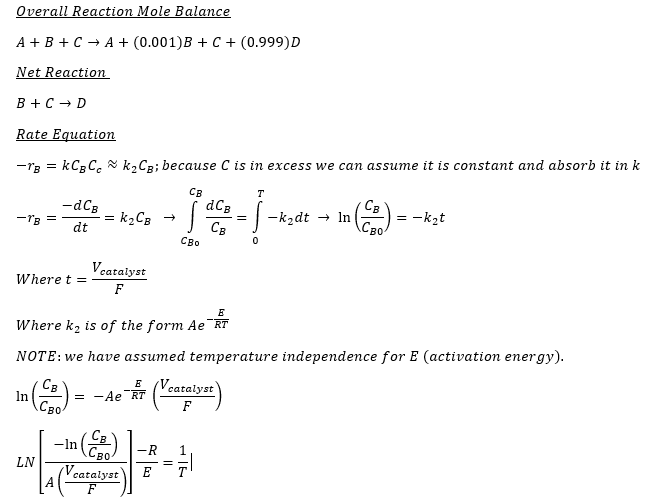

The above equation can now be used to estimate a normalized operating temperature that accounts for deviations from the design process rate, residence time, and feed quality. This equation will be used to normalize observations of reactor operating temperature, assess the degree of activity loss, and predict when the maximum operating temperature will be achieved.  

Parameters in the above equation are known, fixed or derived.

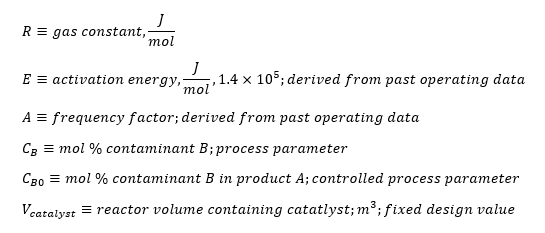

## **Determination & Forecasting of Catalyts Aging**
The process flow below depicts the process for determination of the catalys aging rate and subsequent prediction of the the end or run date. 

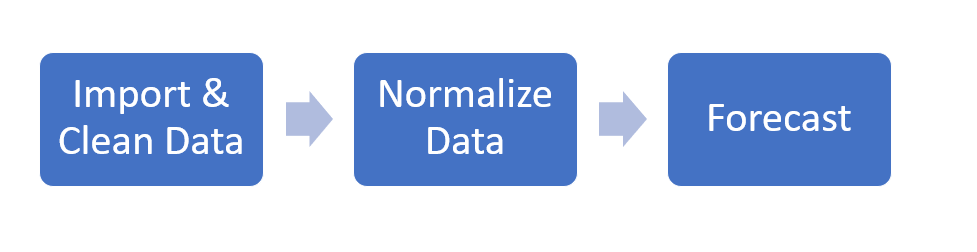

#### **Import & Clean Data**
Like many data sets from any real-time operation the data does not always come ready to use. This data set in particular has several issues that require attention. These include:
* Data from Process Upsets: 
    * Such data often produces extrem values due to unplanned upsest in the operation. Example might incude a loss of utilities such as power or mechanical reliability incidents such leading to a loss of equipment. This data set includes several of these occurences. 
* Missing or Bad Data: 
    * Data for operations is often collected from a data historian software that logs values from a distributed control system. Outages of any of these sytesm from the data historian down to the process instrument can result in bad inputs. This data set includes one set of continous occurences. 
* Incomplete Observations
    * As mentioned most data that can be directly sensed and measured such as pressure and temperature are collected in a distributed control system and logged in a data historian in almost real time. Other data may require labratory analytics and therefor is sampled at a different interval. In this data set samples of the contaminant level of "B" in "A" are only available during weekdays when the labratory is staffed. This data is missing from weekends.
    
Because extreme values will obscure the trend of data, and because we require complete observations to normalize the data any occurences of data from process upsets or any incomplete, bad data sets will be dropped. 

Text(0, 0.5, 'Tempeature (C)')

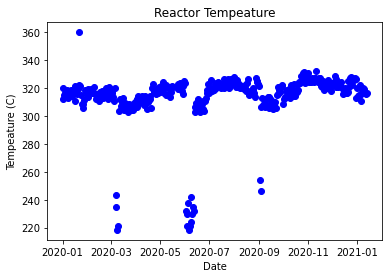

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from statsmodels.tsa.api import Holt

#read in data set
df = pd.read_excel('DATA.xlsx',parse_dates=['DATE'])

#rename columns to remove special charaters and simplify
df.columns = ['DATE','TEMP_C','FLOWRATE_M3HR','CONC_MOL']

#check data set came in correctly and do an initial plot


plt.plot(df['DATE'], df['TEMP_C'],'bo')
plt.title('Reactor Tempeature')
plt.xlabel('Date')
plt.ylabel('Tempeature (C)')
#extreme values can be observed

(array([737425., 737485., 737546., 737607., 737669., 737730., 737791.]),
 <a list of 7 Text major ticklabel objects>)

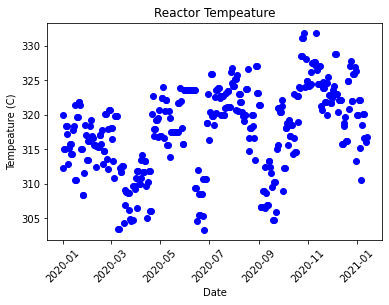

In [2]:
#begin cleaning data

#first fill all missing data with NaN values for easy replacement operations.
df['TEMP_C'].where(df['CONC_MOL'].notnull(),np.nan,inplace=True)
df['FLOWRATE_M3HR'].where(df['CONC_MOL'].notnull(),np.nan,inplace=True)

##next, detect and remove extreme values for temperature and replace with NaN values
#Calculat interquartile range 
IQR=df['TEMP_C'].quantile(q=0.75)-df['TEMP_C'].quantile(q=0.25)

#define upper and lower limit for extreme values detection by definign thresholds as +/- 1.5xIQR above or below the 75% and 25% quantiles, respectively
Ext_UL=df['TEMP_C'].quantile(q=0.75)+1.5*IQR
Ext_LL=df['TEMP_C'].quantile(q=0.25)-1.5*IQR

#Detect and replace extreme values with NaN. Since an extreme temperature value is not useful the associate measurements of flow and conc are not either. 
df['FLOWRATE_M3HR'].where(df['TEMP_C']<Ext_UL,np.nan,inplace=True)
df['CONC_MOL'].where(df['TEMP_C']<Ext_UL,np.nan,inplace=True)
df['TEMP_C'].where(df['TEMP_C']<Ext_UL,np.nan,inplace=True)


df['FLOWRATE_M3HR'].where(df['TEMP_C']>Ext_LL,np.nan,inplace=True)
df['CONC_MOL'].where(df['TEMP_C']>Ext_LL,np.nan,inplace=True)
df['TEMP_C'].where(df['TEMP_C']>Ext_LL,np.nan,inplace=True)

#finally, look for days where plant was not operable. 
df['TEMP_C'].where(df['FLOWRATE_M3HR']!=0,np.nan,inplace=True)
df['CONC_MOL'].where(df['FLOWRATE_M3HR']!=0,np.nan,inplace=True)
df['FLOWRATE_M3HR'].where(df['FLOWRATE_M3HR']!=0,np.nan,inplace=True)

#fill in missing data to ensure time series has equal intervals for forceasting. We will backfill one step with the latest value then foreward fill the rest.
df.fillna(method='bfill',inplace=True,limit=1)
df.fillna(method='ffill',inplace=True)

#recheck data set to make sure extreme values are removed and that there are not more obvious issues with the data set
plt.plot(df['DATE'], df['TEMP_C'],'bo')
plt.title('Reactor Tempeature')
plt.xlabel('Date')
plt.ylabel('Tempeature (C)')
plt.xticks(rotation=45)

#### **Normalize Data**
Now that the data has been cleaned we will normalize the operating temperature data. We will do this using the equations outlined earlier and calculating temperature correction components for flow rates and feed qualities that deviate from design operation values. 

(array([737425., 737485., 737546., 737607., 737669., 737730., 737791.]),
 <a list of 7 Text major ticklabel objects>)

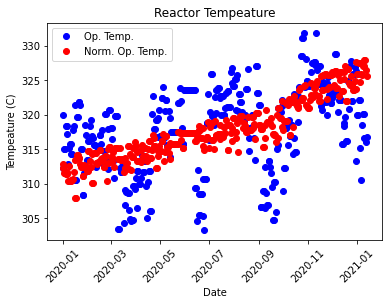

In [3]:
#define parameters for operation to be used in normalizing dat; these are design values of the catalyst loading system that reflect normal operation, 
#and from which the chemical reaction parameters were derived.
Cb_o=0.01 #1000 ppm by molar concentration
Cb=0.001 #design feed concentration
V_cat= 10 #m3 of fixed bed catallyst
R_gas=8.314 #J/mol gas constant
E_act=104000 #J/mol
A_freq=1000000 #frequency factor
F_des=8 #m3/hr of design flow rate
maxTemp=352 #maximum operating temperature of catalyst system

#calculate temperature adjustments needed for non-design feed concentrations and flow rates.
df['TEMP_F_ADJ']=1/(-np.log(-np.log(Cb/Cb_o)/A_freq/(V_cat/8*3600))*R_gas/E_act)-1/(-np.log(-np.log(Cb/Cb_o)/A_freq/(V_cat/df['FLOWRATE_M3HR']*3600))*R_gas/E_act)
df['TEMP_Cb_ADJ']=1/(-np.log(-np.log(Cb/Cb_o)/A_freq/(V_cat/8*3600))*R_gas/E_act)-1/(-np.log(-np.log(Cb/df['CONC_MOL'])/A_freq/(V_cat/8*3600))*R_gas/E_act)
df['TEMP_NORM']=df['TEMP_C']+df['TEMP_F_ADJ']+df['TEMP_Cb_ADJ']

#plot normalized data over raw, cleaned data
plt.plot(df['DATE'], df['TEMP_C'],'bo',label='Op. Temp.')
plt.plot(df['DATE'], df['TEMP_NORM'],'ro',label='Norm. Op. Temp.')
plt.title('Reactor Tempeature')
plt.xlabel('Date')
plt.ylabel('Tempeature (C)')
plt.legend()
plt.xticks(rotation=45)

#### **Forecast**

In [4]:
#define new dataframe
df2=df

#set index as date
df2.index=df2.DATE

#fit a Holt's Linear Trend to the data using optimization heuristics
fit1=Holt(df2['TEMP_NORM']).fit()
alpha1=fit1.params['smoothing_level']
beta1=fit1.params['smoothing_slope']
#Calculate variance of fitted values for generating prediction intervals
rVar=np.var(fit1.resid)

#run loop with fitted model to forecast data until forecast hits the maximum operating temperature defined earlier
step=1
fcast=fit1.forecast(steps=step)
while(fcast[len(fcast)-1]<maxTemp):
    step=step+1
    fcast=fit1.forecast(steps=step)

#create a new data frame for forecasted data, name column, then add new columns that includes the data and the prediction interval.
df3=pd.DataFrame(fcast)
df3.columns = ['TEMP_FRCST']
df3['DATE']=np.nan
df3['PI_U']=np.nan
df3['PI_L']=np.nan

#with temperature forecasts complete, loop to create dates for forecasted data and generate prediction interval
newdates=[]
for i in range(1,step+1):
    newdate=(df2['DATE'].tail(1)+np.timedelta64(i,'D'))
    pi_U=fcast[i-1]+0.67*((rVar*(1+(i-1)*((alpha1**2)+alpha1*beta1*i+1/6*(beta1**2)*i*(2*i-1))))**0.5)
    pi_L=fcast[i-1]-0.67*((rVar*(1+(i-1)*((alpha1**2)+alpha1*beta1*i+1/6*(beta1**2)*i*(2*i-1))))**0.5)
    df3.iloc[i-1,1]=(newdate[0])
    df3.iloc[i-1,2]=(pi_U)
    df3.iloc[i-1,3]=(pi_L)

#reindex df3
df3.DATE=pd.to_datetime(df3.DATE)
df3.index=df3.DATE

#append forecast dataframe to df2
df2=df2.append(df3)

#review Holt's model parameters
fit1.summary()

C:\Users\geoff\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\geoff\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


Dep. Variable:,endog,No. Observations:,379
Model:,Holt,SSE,715.407
Optimized:,True,AIC,248.785
Trend:,Additive,BIC,264.535
Seasonal:,None,AICC,249.010
Seasonal Periods:,None,Date:,"Sat, 16 Jan 2021"
Box-Cox:,False,Time:,08:14:42
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.1179924,alpha,True
smoothing_slope,0.000000,beta,True


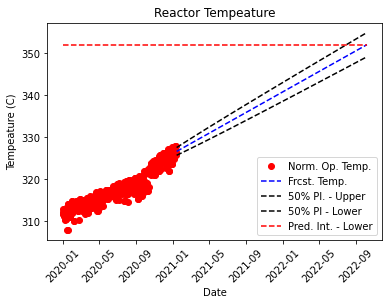

In [5]:
#plot reults of forecast and state anticipated end of run date

df2['MAX TEMP']=maxTemp
plt.plot(df2['DATE'], df2['TEMP_NORM'],'ro',label='Norm. Op. Temp.')
plt.plot(df2['DATE'], df2['TEMP_FRCST'],'b--',label='Frcst. Temp.')
plt.plot(df2['DATE'], df2['PI_U'],'k--',label='50% PI. - Upper')
plt.plot(df2['DATE'], df2['PI_L'],'k--',label='50% PI - Lower')
plt.plot(df2['DATE'], df2['MAX TEMP'],'r--',label='Pred. Int. - Lower')

plt.title('Reactor Tempeature')
plt.xlabel('Date')
plt.ylabel('Tempeature (C)')
plt.legend()
plt.xticks(rotation=45)

EndRun='End of run ancticipated to occur on '+str(df2['DATE'].iloc[-1].month)+"/"+str(df2['DATE'].iloc[-1].day)+"/"+str(df2['DATE'].iloc[-1].year)+'.'\
     +"End of run date project based on design to operate at design capacity. Additional run length can be achieved if plan is operated below design."

#### **Alternative End of Run Forecast**
Input three distince periods of planned rates and feed qualities based on the supply and trading outlook. The fouling rate from the forecasted line will then be used to project the actual operating temperature required (reverse of normalization), which will then project how this forecast looks again the maximum operating temperature. This functionality is key, as it will allow for advanced planning on rates and feed qualities required to his a certain date!

In [6]:
#ask user for planed rates and feed qualities up to three separate periods
userData=input("Enter 3 future periods. Input requied is flow rate [m3/Hr], feed concentration[mol %], and durations in days. Input should be separated by commas\
              no spaces. Note the last period qualitie will be extended if needed to forecast EOR date. (e.g. 8,10,8,1,1.1,0.9,250,300,50):")

#set values needed to calculate forecast
Fouling_Rate=df2['TEMP_FRCST'][-1]-df2['TEMP_FRCST'][-2] #erived from holt linear trend forecast
Last_Temp=df['TEMP_NORM'][-1] #last normalized temperature on which we will build the forecast for actual operating temperature based on user conditions
Last_Date=df['DATE'][-1] #last date to start forecast 
planned=userData.split(sep=",")#split user input data
f1=np.array([float(planned[0]),float(planned[1]),float(planned[2])]) #build array for flows
c1=np.array([float(planned[3]),float(planned[4]),float(planned[5])])/100 #build array for concentrations
d1=np.array([int(planned[6]),int(planned[7]),int(planned[8])]) #build array for duration of each period

Enter 3 future periods. Input requied is flow rate [m3/Hr], feed concentration[mol %], and durations in days. Input should be separated by commas              no spaces. Note the last period qualitie will be extended if needed to forecast EOR date. (e.g. 8,10,8,1,1.1,0.9,250,300,50): 8,10,8,1,1.1,0.9,250,300,50


## 

In [7]:
#create series of dates for new forecast, generate a empty data frame, and store dates in new data frame
pln_dates=[Last_Date+np.timedelta64(i+1,'D') for i in range(0,d1.sum())]
df_p=pd.DataFrame()
df_p['DATE']=pln_dates

Alt_EOR=np.array([]) #generate empty array to store forecasted temperatures

#loop through each duration provided calclate temperature adjustments for feed rate and feed concentration and add it to last operating temperature and 
#include fouling rate 
for i in range(df_p.shape[0]):
    if (i+1) <= d1[0]:
        TaF=1/(-np.log(-np.log(Cb/Cb_o)/A_freq/(V_cat/8*3600))*R_gas/E_act)-1/(-np.log(-np.log(Cb/Cb_o)/A_freq/(V_cat/f1[0]*3600))*R_gas/E_act)
        TaC=1/(-np.log(-np.log(Cb/Cb_o)/A_freq/(V_cat/8*3600))*R_gas/E_act)-1/(-np.log(-np.log(Cb/c1[0])/A_freq/(V_cat/8*3600))*R_gas/E_act)
        TaT=Last_Temp-TaF-TaC+(i+1)*Fouling_Rate
        Alt_EOR=np.append(Alt_EOR,TaT)
    if (i+1) > d1[0] and (i+1) <= d1[:2].sum():
        TaF=1/(-np.log(-np.log(Cb/Cb_o)/A_freq/(V_cat/8*3600))*R_gas/E_act)-1/(-np.log(-np.log(Cb/Cb_o)/A_freq/(V_cat/f1[1]*3600))*R_gas/E_act)
        TaC=1/(-np.log(-np.log(Cb/Cb_o)/A_freq/(V_cat/8*3600))*R_gas/E_act)-1/(-np.log(-np.log(Cb/c1[1])/A_freq/(V_cat/8*3600))*R_gas/E_act)
        TaT=Last_Temp-TaF-TaC+(i+1)*Fouling_Rate
        Alt_EOR=np.append(Alt_EOR,TaT)
    if (i+1) >d1[:2].sum():
        TaF=1/(-np.log(-np.log(Cb/Cb_o)/A_freq/(V_cat/8*3600))*R_gas/E_act)-1/(-np.log(-np.log(Cb/Cb_o)/A_freq/(V_cat/f1[2]*3600))*R_gas/E_act)
        TaC=1/(-np.log(-np.log(Cb/Cb_o)/A_freq/(V_cat/8*3600))*R_gas/E_act)-1/(-np.log(-np.log(Cb/c1[2])/A_freq/(V_cat/8*3600))*R_gas/E_act)
        TaT=Last_Temp-TaF-TaC+(i+1)*Fouling_Rate
        Alt_EOR=np.append(Alt_EOR,TaT)

df_p['TEMP']=Alt_EOR #add temp forecast to data frame. 

(array([737425., 737546., 737669., 737791., 737911., 738034., 738156.,
        738276., 738399.]),
 <a list of 9 Text major ticklabel objects>)

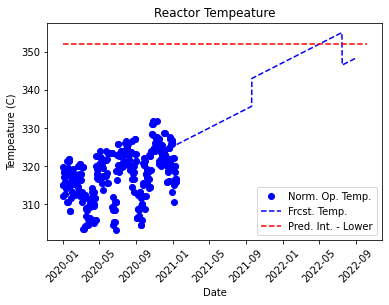

In [8]:
plt.plot(df2['DATE'], df2['TEMP_C'],'bo',label='Norm. Op. Temp.')
plt.plot(df_p['DATE'], df_p['TEMP'],'b--',label='Frcst. Temp.')
plt.plot(df2['DATE'], df2['MAX TEMP'],'r--',label='Pred. Int. - Lower')

plt.title('Reactor Tempeature')
plt.xlabel('Date')
plt.ylabel('Tempeature (C)')
plt.legend()
plt.xticks(rotation=45)

As scene in the above graph the planned rates are not feasible. Planning will need to adjust the second duration in order to account for catalyts deactivation. 